# Courte introduction au machine learning

Le jeu de données [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) recense les composants chimiques de vins ainsi que la note d'experts. Peut-on prédire cette note à partir des composants chimiques ? Peut-être que si on arrive à construire une fonction qui permet de prédire cette note, on pourra comprendre comment l'expert note les vins.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Données et première régression linéaire

On peut utiliser la fonction implémentée dans ce module.

In [3]:
from papierstat.datasets import load_wines_dataset
df = load_wines_dataset()
df["color2"] = 0
df.loc[df["color"] == "white", "color2"] = 1
df["color"] = df["color2"]
df = df.drop('color2', axis=1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Ou on peut aussi récupérer les données depuis le site et former les mêmes données.

In [4]:
# import pandas
# df_red = pandas.read_csv('winequality-red.csv', sep=';')
# df_red['color'] = 0
# df_white = pandas.read_csv('winequality-white.csv', sep=';')
# df_white['color'] = 1
# df = pandas.concat([df_red, df_white])
# df.shape, df_red.shape, df_white.shape

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


J'ai tendance à utiliser ``df`` partout quitte à ce que le premier soit écrasé. Conservons-le dans une variable à part.

In [6]:
df_data = df

Quelle est la distribution des notes ?

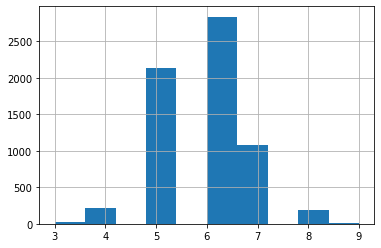

In [7]:
df['quality'].hist();

Les notes pour les blancs et les rouges.

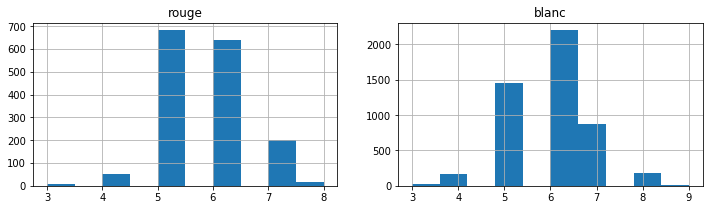

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
df[df['color'] == 0]['quality'].hist(ax=ax[0])
df[df['color'] == 1]['quality'].hist(ax=ax[1])
ax[0].set_title('rouge')
ax[1].set_title('blanc');

On construit le jeu de données. D'un côté, ce qu'on sait - les features X -, d'un autre ce qu'on cherche à prédire.

In [9]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [10]:
X = df.drop("quality", axis=1)
y = df['quality']

On divise en apprentissage / test puisqu'il est de coutume d'apprendre sur des données et de vérifier les prédictions sur un autre.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

On cale un premier modèle, une régression linéaire.

In [12]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

On récupère les coefficients.

In [13]:
clr.coef_

array([ 9.55561389e-02, -1.53182004e+00, -9.60658321e-02,  6.51351208e-02,
       -3.21323223e-01,  6.06114885e-03, -1.60663994e-03, -1.05342354e+02,
        5.14593092e-01,  7.84057766e-01,  2.32175504e-01, -3.29941606e-01])

In [14]:
clr.intercept_

105.86698928549437

Puis on calcule le coefficient $R^2$.

In [15]:
from sklearn.metrics import r2_score
pred = clr.predict(X_test)
r2_score(y_test, pred)

0.26585260463659766

Ou l'erreur moyenne en valeur absolue.

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, clr.predict(X_test))

0.5682450595415709

Le modèle se trompe en moyenne d'un demi-point pour la note.

## Arbre de régression

Voyons ce qu'un arbre de régression peut faire.

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
r2_score(y_test, dt.predict(X_test))

0.23296913633060767

L'arbre de régression révèle l'intérêt d'avoir une base d'apprentissage et de test puisque ce modèle peut répliquer à l'identique les données sur lequel le modèle a été estimé. A contrario, sur la base de test, les performances en prédiction sont plutôt mauvaise.

In [19]:
r2_score(y_train, dt.predict(X_train))

0.628882928712209

Pour éviter cela, on joue avec le paramètre *min_smaple_leaf*. Il signifie qu'une prédiction de l'arbre de régression est une moyenne d'au moins *min_sample_leaf* notes tirées de le base d'apprentissage. Il y a beaucoup moins de chance que cela aboutisse à du sur apprentissage.

In [20]:
import pandas
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
res = []
for i in tqdm(range(1, 50)):
    dt = DecisionTreeRegressor(min_samples_leaf=i)
    reg = LinearRegression()
    dt.fit(X_train, y_train)
    reg.fit(X_train, y_train)
    r = {
        'minl': i,
        'r2_train_dt': r2_score(y_train, dt.predict(X_train)),
        'r2_test_dt': r2_score(y_test, dt.predict(X_test)),
        'r2_train_reg': r2_score(y_train, reg.predict(X_train)),
        'r2_test_reg': r2_score(y_test, reg.predict(X_test)),
    }
    res.append(r)
df = pandas.DataFrame(res)
df.head(2)

100%|██████████| 49/49 [00:01<00:00, 27.92it/s]


,minl,r2_train_dt,r2_test_dt,r2_train_reg,r2_test_reg
0,1,1.000000,-0.012026,0.30522,0.265853
1,2,0.929258,0.128511,0.30522,0.265853


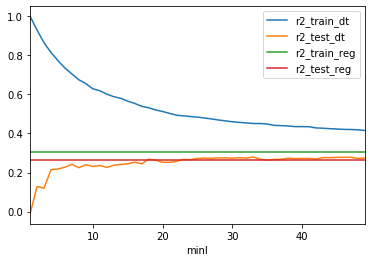

In [21]:
df.plot(x="minl", y=["r2_train_dt", "r2_test_dt",
                     "r2_train_reg", "r2_test_reg"]);

On voit que la performance sur la base de test augmente rapidement puis stagne sans jamais rattraper celle de la base d'apprentissage. Elle ne dépasse pas celle d'un modèle linéaire ce qui est décevant. Essayons avec une forêt aléatoire.

## Forêt aléatoire

In [22]:
import pandas
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
res = []
for i in tqdm(range(1, 50, 2)):
    dt = DecisionTreeRegressor(min_samples_leaf=i)
    reg = LinearRegression()
    rf = RandomForestRegressor(n_estimators=25, min_samples_leaf=i)
    dt.fit(X_train, y_train)
    reg.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    r = {
        'minl': i,
        'r2_train_dt': r2_score(y_train, dt.predict(X_train)),
        'r2_test_dt': r2_score(y_test, dt.predict(X_test)),
        'r2_train_reg': r2_score(y_train, reg.predict(X_train)),
        'r2_test_reg': r2_score(y_test, reg.predict(X_test)),
        'r2_train_rf': r2_score(y_train, rf.predict(X_train)),
        'r2_test_rf': r2_score(y_test, rf.predict(X_test)),
    }
    res.append(r)
df = pandas.DataFrame(res)
df.head(2)

100%|██████████| 25/25 [00:11<00:00,  2.67it/s]


,minl,r2_train_dt,r2_test_dt,r2_train_reg,r2_test_reg,r2_train_rf,r2_test_rf
0,1,1.000000,-0.020307,0.30522,0.265853,0.919279,0.472297
1,3,0.865292,0.121411,0.30522,0.265853,0.831554,0.449558


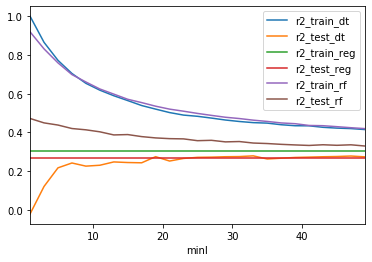

In [23]:
df.plot(x="minl", y=["r2_train_dt", "r2_test_dt",
                     "r2_train_reg", "r2_test_reg",
                     "r2_train_rf", "r2_test_rf"]);

A l'inverse de l'arbre de régression, la forêt aléatoire est meilleure lorsque ce paramètre est petit. Une forêt est une moyenne de modèle, chacun appris sur un sous-échantillon du jeu de données initiale. Même si un arbre apprend par coeur, il est peu probable que son voisin ait appris le même sous-échantillon. En faisant la moyenne, on fait un compromis.

## Validation croisée

Il reste à vérifier que le modèle est robuste. C'est l'objet de la validation croisée qui découpe le jeu de données en 5 parties, apprend sur 4, teste une 1 puis recommence 5 fois en faisant varier la partie qui sert à tester.

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(
    RandomForestRegressor(n_estimators=25), X, y, cv=5,
    verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


array([0.09638301, 0.24865257, 0.24491948, 0.3365657 , 0.27020685])

Ce résultat doit vous interrompre car les performances sont loin d'être stables. Deux options : soit le modèle n'est pas robuste, soit la méthodologie est fausse quelque part. Comme le problème est assez simple, il est probable que ce soit la seconde option : la jeu de données est triée. Les vins rouges d'abord, les blancs ensuite. Il est possible que la validation croisée estime un modèle sur des vins rouges et l'appliquent à des vins blancs. Cela ne marche pas visiblement. Cela veut dire aussi que les vins blancs et rouges sont très différents et que la couleur est probablement une information redondante avec les autres. Mélangeons les données au hasard.

In [25]:
from sklearn.utils import shuffle
X2, y2 = shuffle(X, y)

In [26]:
cross_val_score(
    RandomForestRegressor(n_estimators=25), X2, y2, cv=5,
    verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished


array([0.50914668, 0.51085456, 0.47606708, 0.470274  , 0.4910203 ])

Beaucoup mieux. On peut faire comme ça aussi.

In [27]:
from sklearn.model_selection import ShuffleSplit
cross_val_score(
    RandomForestRegressor(n_estimators=25), X, y, cv=ShuffleSplit(5),
    verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


array([0.49934648, 0.51283412, 0.49947554, 0.51852781, 0.50982058])

## Pipeline

On peut caler un modèle après une ACP mais il faut bien se souvenir de toutes les étapes intermédiaires avant de prédire avec le modèle final.

In [28]:
from sklearn.decomposition import PCA
pca = PCA(6)
pca.fit(X_train, y_train)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
rf = RandomForestRegressor(n_estimators=100)
X_train_pca = pca.transform(X_train)
rf.fit(X_train_pca, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
X_test_pca = pca.transform(X_test)
pred = rf.predict(X_test_pca)
r2_score(y_test, pred)

0.4265246191175617

Ou alors on utilise le concept de *pipeline* qui permet d'assembler les prétraitements et le modèle prédictif sous la forme d'une séquence de traitement qui devient le modèle unique.

In [31]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('acp', PCA(n_components=6)),
    ('rf', RandomForestRegressor(n_estimators=100))
])
pipe.fit(X_train, y_train);

## Grille de recherche

De cette façon, on peut chercher simplement les meilleurs hyperparamètres du modèle.

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'acp__n_components': list(range(1, 11, 3)),
              'rf__n_estimators': [10, 20, 50]}
grid = GridSearchCV(pipe, param_grid=param_grid, verbose=1,
                   cv=ShuffleSplit(3))
grid.fit(X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   30.2s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('acp',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=6, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('rf',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              m...
                                                              min_samp

In [33]:
grid.best_params_

{'acp__n_components': 10, 'rf__n_estimators': 50}

In [34]:
grid.predict(X_test)

array([7.26, 5.04, 7.  , ..., 6.82, 4.36, 5.98])

In [35]:
r2_score(y_test, grid.predict(X_test))

0.9304716908051051

Ce nombre paraît beaucoup trop beau pour être vrai. Cela signifie sans doute que les données de test ont été utilisés pour effectuer la recherche.

In [36]:
grid.best_score_

0.5186266164209307

Nettement plus plausible.

## Enregistrer, restaurer

Le moyen le plus simple de conserver les modèles en python est de les sérialiser : on copie la mémoire sur disque puis on la restaure plus tard.

In [37]:
import pickle

with open('piperf.pickle', 'wb') as f:
    pickle.dump(grid, f)

In [38]:
glob.glob('*.pickle')

['piperf.pickle']

In [39]:
with open("piperf.pickle", 'rb') as f:
    grid2 = pickle.load(f)

In [40]:
grid2.predict(X_test)

array([7.26, 5.04, 7.  , ..., 6.82, 4.36, 5.98])

## Prédiction de la couleur

Le fait que la première validation croisée échoue était un signe que la couleur était facilement prévisible. Vérifions.

In [41]:
Xc = df_data.drop(['quality', 'color'], axis=1)
yc = df_data["color"]

In [42]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc)

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', max_iter=1500)
log.fit(Xc_train, yc_train);

In [44]:
from sklearn.metrics import log_loss
log_loss(yc_test, log.predict_proba(Xc_test))

0.06033080553588955

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yc_test, log.predict(Xc_test))

array([[ 384,   16],
       [   7, 1218]], dtype=int64)

La matrice de confusion est plutôt explicite.